In [1]:
from matplotlib import pyplot as plt

from src.moglow import Moglow
from src.data import DigitsDataset

In [2]:
dataset = DigitsDataset()

In [3]:
num_channels, seq_len = dataset[0][0].shape
model = Moglow(
    num_channels=num_channels,
    seq_len=seq_len,
    levels=10,
    hidden_channels=128
)

In [4]:
loss = model.train(dataset, batch_size=128, max_epochs=100, log_interval=10)

 - Epoch  10: 355.531
 - Epoch  20: 359.561
 - Epoch  30: 347.937
 - Epoch  40: 341.929
 - Epoch  50: 337.514
 - Epoch  60: 325.679
 - Epoch  70: 315.636
 - Epoch  80: 316.224
 - Epoch  90: 313.526
 - Epoch 100: 306.285


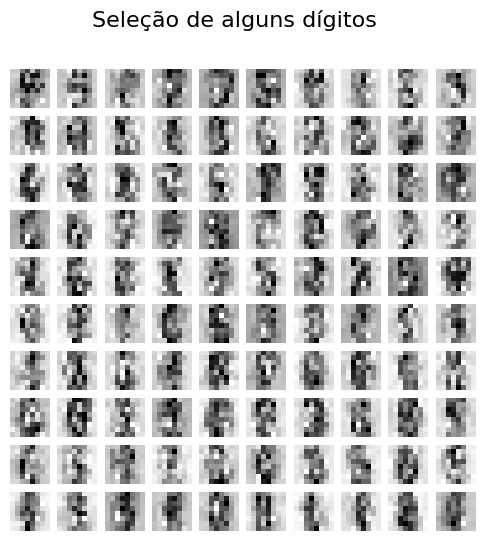

In [5]:
n_samples = 100
samples, log_prob = model.sample(n_samples)
images = samples[log_prob.argsort(), :].reshape(n_samples, num_channels, num_channels).cpu().detach().numpy()

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(images[idx, :, :], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Seleção de alguns dígitos", fontsize=16)